In [1]:
import requests
import json
import csv
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress
from sklearn import datasets
import seaborn as sn
import statsmodels.api as sm
from numpy import NaN

In [2]:
csvfile = "./Resources/2019.csv"
csv_df = pd.read_csv(csvfile)
csv_df["Year"] = "2019"
len(csv_df)

620

In [3]:
csvfile18 = "./Resources/2018.csv"
csv_df18 = pd.read_csv(csvfile18)
csv_df18["Year"] = "2018"
len(csv_df18)

622

In [4]:
csvfile17 = "./Resources/2017.csv"
csv_df17 = pd.read_csv(csvfile17)
csv_df17["Year"] = "2017"
len(csv_df17)

571

In [5]:
csvfile16 = "./Resources/2016.csv"
csv_df16 = pd.read_csv(csvfile16)
csv_df16["Year"] = "2016"
len(csv_df16)

584

In [6]:
csvfile15 = "./Resources/2015.csv"
csv_df15 = pd.read_csv(csvfile15)
csv_df15["Year"] = "2015"
len(csv_df15)

595

In [7]:
combined_df = csv_df.append(csv_df18)
combined_df = combined_df.append(csv_df17)
combined_df = combined_df.append(csv_df16)
combined_df = combined_df.append(csv_df15)
combined_df.drop("Unnamed: 0", axis=1, inplace=True)
combined_df

,Player,Tm,Pos,Age,G,GS,Cmp,Att,Yds,Int,...,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Year
0,Christian McCaffrey,CAR,RB,23.0,16.0,16.0,0.0,2.0,0.0,0.0,...,0.0,0.0,2.0,1387.0,15.0,287.0,1005.0,4.0,469.20,2019
1,Lamar Jackson,BAL,QB,22.0,15.0,15.0,265.0,401.0,3127.0,6.0,...,3127.0,36.0,401.0,1206.0,7.0,176.0,0.0,0.0,415.68,2019
2,Derrick Henry,TEN,RB,25.0,15.0,15.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1540.0,16.0,303.0,206.0,2.0,294.60,2019
3,Aaron Jones,GNB,RB,25.0,16.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1084.0,16.0,236.0,474.0,3.0,314.80,2019
4,Ezekiel Elliott,DAL,RB,24.0,16.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1357.0,12.0,301.0,420.0,2.0,311.70,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,Raheem Mostert,3TM,0,23.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.00,2015
591,Marcus Murphy,NOR,RB,24.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-2.00,2015
592,Isaiah Pead,STL,RB,26.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,-1.70,2015
593,Glenn Winston,CLE,RB,26.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-8.0,0.0,1.0,0.0,0.0,-2.80,2015


In [8]:
playercsv = "./Resources/player_data.csv"
player_df = pd.read_csv(playercsv)
merged_df = pd.merge(combined_df, player_df, left_on = "Player", right_on = "Name", how="left")
merged_df.drop(columns=["G", "GS", "Att", "Yds", "Att.1", "Yds.1", "Yds.2", "Name", "Salary"], inplace=True)
merged_df.drop("Unnamed: 0", axis=1, inplace=True)
merged_df.rename(columns={
    "Tm": "Team",
    "Pos": "Position",
    "Cmp": "Completions",
    "Int": "Interceptions",
    "Tgt": "Targets",
    "Y/R": "YdsPerRec",
    "Rec": "Receptions",
    "Year": "FantasyYear"
}, inplace=True)
merged_df.loc[merged_df["Player"]=="Christian McCaffrey"]

,Player,Team,Position,Age,Completions,Interceptions,Targets,Receptions,YdsPerRec,Fumbles,...,FantasyPoints,FantasyYear,PlayerID,Height,HeightFeet,HeightInches,Weight,Experience,Position,ADP
0,Christian McCaffrey,CAR,RB,23.0,0.0,0.0,142.0,116.0,8.66,1.0,...,469.2,2019,18877.0,"5'11""",5.0,11.0,205.0,5.0,RB,1.7
629,Christian McCaffrey,CAR,RB,22.0,1.0,0.0,124.0,107.0,8.10,4.0,...,385.5,2018,18877.0,"5'11""",5.0,11.0,205.0,5.0,RB,1.7
1302,Christian McCaffrey,CAR,RB,21.0,0.0,0.0,113.0,80.0,8.14,2.0,...,228.6,2017,18877.0,"5'11""",5.0,11.0,205.0,5.0,RB,1.7


In [9]:
merged_df.columns

Index(['Player', 'Team', 'Position', 'Age', 'Completions', 'Interceptions',
       'Targets', 'Receptions', 'YdsPerRec', 'Fumbles', 'FumblesLost',
       'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds', 'RushingTD',
       'RushingAtt', 'ReceivingYds', 'ReceivingTD', 'FantasyPoints',
       'FantasyYear', 'PlayerID', 'Height', 'HeightFeet', 'HeightInches',
       'Weight', 'Experience', 'Position', 'ADP'],
      dtype='object')

In [10]:
undup_df = merged_df.loc[:,~merged_df.columns.duplicated()]
undup_df

,Player,Team,Position,Age,Completions,Interceptions,Targets,Receptions,YdsPerRec,Fumbles,...,ReceivingTD,FantasyPoints,FantasyYear,PlayerID,Height,HeightFeet,HeightInches,Weight,Experience,ADP
0,Christian McCaffrey,CAR,RB,23.0,0.0,0.0,142.0,116.0,8.66,1.0,...,4.0,469.20,2019,18877.0,"5'11""",5.0,11.0,205.0,5.0,1.7
1,Lamar Jackson,BAL,QB,22.0,265.0,6.0,0.0,0.0,0.00,9.0,...,0.0,415.68,2019,19781.0,"6'2""",6.0,2.0,212.0,4.0,20.0
2,Lamar Jackson,BAL,QB,22.0,265.0,6.0,0.0,0.0,0.00,9.0,...,0.0,415.68,2019,22049.0,"6'2""",6.0,2.0,215.0,0.0,NaN
3,Derrick Henry,TEN,RB,25.0,0.0,0.0,24.0,18.0,11.44,5.0,...,2.0,294.60,2019,17959.0,"6'3""",6.0,3.0,247.0,7.0,7.4
4,Aaron Jones,GNB,RB,25.0,0.0,0.0,68.0,49.0,9.67,3.0,...,3.0,314.80,2019,19045.0,"5'9""",5.0,9.0,208.0,5.0,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,Raheem Mostert,3TM,0,23.0,0.0,0.0,0.0,0.0,0.00,1.0,...,0.0,-2.00,2015,17217.0,"5'10""",5.0,10.0,205.0,8.0,42.6
3027,Marcus Murphy,NOR,RB,24.0,0.0,0.0,0.0,0.0,0.00,3.0,...,0.0,-2.00,2015,16989.0,"5'9""",5.0,9.0,195.0,5.0,1046.1
3028,Isaiah Pead,STL,RB,26.0,0.0,0.0,0.0,0.0,0.00,1.0,...,0.0,-1.70,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3029,Glenn Winston,CLE,RB,26.0,0.0,0.0,0.0,0.0,0.00,1.0,...,0.0,-2.80,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
sorted_df = undup_df.sort_values("FantasyPoints", ascending = False)

In [12]:
sorted_df

,Player,Team,Position,Age,Completions,Interceptions,Targets,Receptions,YdsPerRec,Fumbles,...,ReceivingTD,FantasyPoints,FantasyYear,PlayerID,Height,HeightFeet,HeightInches,Weight,Experience,ADP
0,Christian McCaffrey,CAR,RB,23.0,0.0,0.0,142.0,116.0,8.66,1.0,...,4.0,469.20,2019,18877.0,"5'11""",5.0,11.0,205.0,5.0,1.7
2,Lamar Jackson,BAL,QB,22.0,265.0,6.0,0.0,0.0,0.00,9.0,...,0.0,415.68,2019,22049.0,"6'2""",6.0,2.0,215.0,0.0,NaN
1,Lamar Jackson,BAL,QB,22.0,265.0,6.0,0.0,0.0,0.00,9.0,...,0.0,415.68,2019,19781.0,"6'2""",6.0,2.0,212.0,4.0,20.0
631,Patrick Mahomes,KAN,QB,23.0,383.0,12.0,0.0,0.0,0.00,9.0,...,0.0,415.08,2018,18890.0,"6'3""",6.0,3.0,230.0,5.0,16.4
1837,David Johnson,ARI,RB,25.0,0.0,0.0,120.0,80.0,10.99,5.0,...,4.0,405.80,2016,16847.0,"6'1""",6.0,1.0,224.0,8.0,30.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,Kyle Lauletta,NYG,QB,23.0,0.0,1.0,0.0,0.0,0.00,0.0,...,0.0,-2.20,2018,19913.0,"6'2""",6.0,2.0,219.0,3.0,1541.6
1834,Teddy Bridgewater,MIN,QB,25.0,0.0,1.0,0.0,0.0,0.00,0.0,...,0.0,-2.30,2017,16497.0,"6'2""",6.0,2.0,215.0,9.0,226.0
3029,Glenn Winston,CLE,RB,26.0,0.0,0.0,0.0,0.0,0.00,1.0,...,0.0,-2.80,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
626,Corey Clement,PHI,0,25.0,0.0,0.0,0.0,0.0,0.00,2.0,...,0.0,-4.00,2019,19548.0,"5'10""",5.0,10.0,220.0,5.0,313.1


In [13]:
indexPositions = sorted_df[sorted_df["Position"] == "0"].index
indexPositions

sorted_df.drop(indexPositions , inplace=True)
sorted_df

,Player,Team,Position,Age,Completions,Interceptions,Targets,Receptions,YdsPerRec,Fumbles,...,ReceivingTD,FantasyPoints,FantasyYear,PlayerID,Height,HeightFeet,HeightInches,Weight,Experience,ADP
0,Christian McCaffrey,CAR,RB,23.0,0.0,0.0,142.0,116.0,8.66,1.0,...,4.0,469.20,2019,18877.0,"5'11""",5.0,11.0,205.0,5.0,1.7
2,Lamar Jackson,BAL,QB,22.0,265.0,6.0,0.0,0.0,0.00,9.0,...,0.0,415.68,2019,22049.0,"6'2""",6.0,2.0,215.0,0.0,NaN
1,Lamar Jackson,BAL,QB,22.0,265.0,6.0,0.0,0.0,0.00,9.0,...,0.0,415.68,2019,19781.0,"6'2""",6.0,2.0,212.0,4.0,20.0
631,Patrick Mahomes,KAN,QB,23.0,383.0,12.0,0.0,0.0,0.00,9.0,...,0.0,415.08,2018,18890.0,"6'3""",6.0,3.0,230.0,5.0,16.4
1837,David Johnson,ARI,RB,25.0,0.0,0.0,120.0,80.0,10.99,5.0,...,4.0,405.80,2016,16847.0,"6'1""",6.0,1.0,224.0,8.0,30.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,Marcus Murphy,NOR,RB,24.0,0.0,0.0,0.0,0.0,0.00,3.0,...,0.0,-2.00,2015,16989.0,"5'9""",5.0,9.0,195.0,5.0,1046.1
1254,Kyle Lauletta,NYG,QB,23.0,0.0,1.0,0.0,0.0,0.00,0.0,...,0.0,-2.20,2018,19913.0,"6'2""",6.0,2.0,219.0,3.0,1541.6
1834,Teddy Bridgewater,MIN,QB,25.0,0.0,1.0,0.0,0.0,0.00,0.0,...,0.0,-2.30,2017,16497.0,"6'2""",6.0,2.0,215.0,9.0,226.0
3029,Glenn Winston,CLE,RB,26.0,0.0,0.0,0.0,0.0,0.00,1.0,...,0.0,-2.80,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
sorted_df["Height_ft_in"] = sorted_df["HeightFeet"] * 12
sorted_df["Height_Total"] = sorted_df["Height_ft_in"] + sorted_df["HeightInches"]
sorted_df

,Player,Team,Position,Age,Completions,Interceptions,Targets,Receptions,YdsPerRec,Fumbles,...,FantasyYear,PlayerID,Height,HeightFeet,HeightInches,Weight,Experience,ADP,Height_ft_in,Height_Total
0,Christian McCaffrey,CAR,RB,23.0,0.0,0.0,142.0,116.0,8.66,1.0,...,2019,18877.0,"5'11""",5.0,11.0,205.0,5.0,1.7,60.0,71.0
2,Lamar Jackson,BAL,QB,22.0,265.0,6.0,0.0,0.0,0.00,9.0,...,2019,22049.0,"6'2""",6.0,2.0,215.0,0.0,NaN,72.0,74.0
1,Lamar Jackson,BAL,QB,22.0,265.0,6.0,0.0,0.0,0.00,9.0,...,2019,19781.0,"6'2""",6.0,2.0,212.0,4.0,20.0,72.0,74.0
631,Patrick Mahomes,KAN,QB,23.0,383.0,12.0,0.0,0.0,0.00,9.0,...,2018,18890.0,"6'3""",6.0,3.0,230.0,5.0,16.4,72.0,75.0
1837,David Johnson,ARI,RB,25.0,0.0,0.0,120.0,80.0,10.99,5.0,...,2016,16847.0,"6'1""",6.0,1.0,224.0,8.0,30.7,72.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,Marcus Murphy,NOR,RB,24.0,0.0,0.0,0.0,0.0,0.00,3.0,...,2015,16989.0,"5'9""",5.0,9.0,195.0,5.0,1046.1,60.0,69.0
1254,Kyle Lauletta,NYG,QB,23.0,0.0,1.0,0.0,0.0,0.00,0.0,...,2018,19913.0,"6'2""",6.0,2.0,219.0,3.0,1541.6,72.0,74.0
1834,Teddy Bridgewater,MIN,QB,25.0,0.0,1.0,0.0,0.0,0.00,0.0,...,2017,16497.0,"6'2""",6.0,2.0,215.0,9.0,226.0,72.0,74.0
3029,Glenn Winston,CLE,RB,26.0,0.0,0.0,0.0,0.0,0.00,1.0,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
sorted_df[["Age", "FantasyPoints"]] 

,Age,FantasyPoints
0,23.0,469.20
2,22.0,415.68
1,22.0,415.68
631,23.0,415.08
1837,25.0,405.80
...,...,...
3027,24.0,-2.00
1254,23.0,-2.20
1834,25.0,-2.30
3029,26.0,-2.80


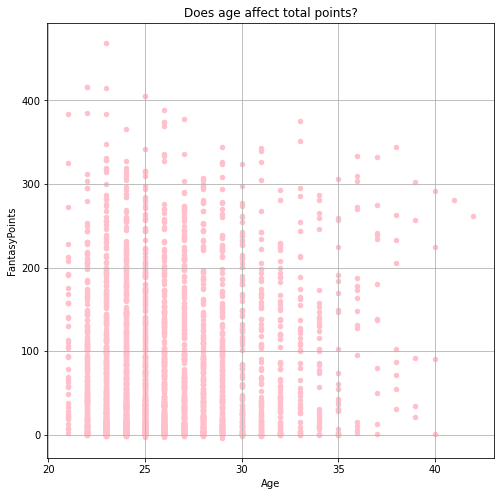

In [16]:
sorted_df.plot(kind="scatter", x="Age", y="FantasyPoints", grid=True, figsize=(8,8), c="pink", title="Does age affect total points?")
plt.show()

In [17]:
sorted_df[["Weight", "FantasyPoints"]] 

,Weight,FantasyPoints
0,205.0,469.20
2,215.0,415.68
1,212.0,415.68
631,230.0,415.08
1837,224.0,405.80
...,...,...
3027,195.0,-2.00
1254,219.0,-2.20
1834,215.0,-2.30
3029,NaN,-2.80


<AxesSubplot:title={'center':'Does weight affect total points?'}, xlabel='Weight', ylabel='FantasyPoints'>

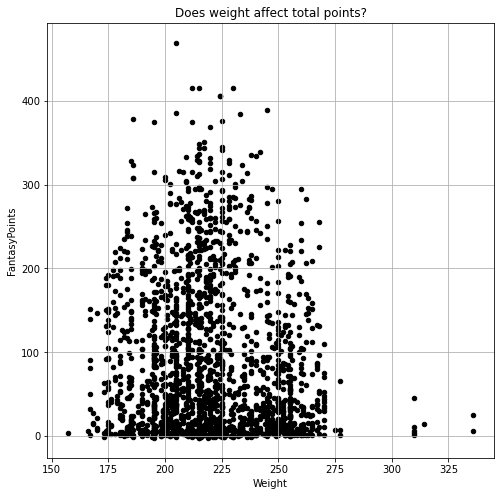

In [18]:
sorted_df.plot(kind="scatter", x="Weight", y="FantasyPoints", grid=True, figsize=(8,8), c="black", title="Does weight affect total points?")

In [19]:
x = sorted_df["Weight"]
y = sorted_df["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.479
Model:                            OLS   Adj. R-squared (uncentered):              0.479
Method:                 Least Squares   F-statistic:                              1833.
Date:                Tue, 16 Feb 2021   Prob (F-statistic):                   1.41e-284
Time:                        04:12:19   Log-Likelihood:                         -11843.
No. Observations:                1994   AIC:                                  2.369e+04
Df Residuals:                    1993   BIC:                                  2.369e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.3978      0.009     42.815      0.000       0.380       0.416
==============================================================================
Omnibus:                      261.069   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              370.787
Skew:                           1.043   Prob(JB):                     3.05e-81
Kurtosis:                       3.330   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
sorted_df[["Height_Total", "FantasyPoints"]]

,Height_Total,FantasyPoints
0,71.0,469.20
2,74.0,415.68
1,74.0,415.68
631,75.0,415.08
1837,73.0,405.80
...,...,...
3027,69.0,-2.00
1254,74.0,-2.20
1834,74.0,-2.30
3029,NaN,-2.80


<AxesSubplot:title={'center':'Does height affect total points?'}, xlabel='Height_Total', ylabel='FantasyPoints'>

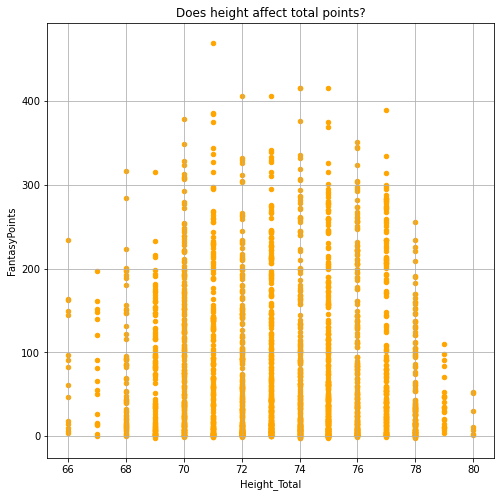

In [21]:

sorted_df.plot(kind="scatter", x="Height_Total", y="FantasyPoints", grid=True, figsize=(8,8), c="orange", title="Does height affect total points?")

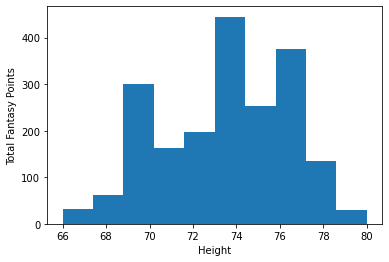

NormaltestResult(statistic=nan, pvalue=nan)


In [22]:
heights = sorted_df["Height_Total"]
plt.hist(heights)
plt.xlabel("Height")
plt.ylabel("Total Fantasy Points")
plt.show()
print(sts.normaltest(heights.sample(50)))

In [23]:
positionPoints_df = sorted_df.groupby("Position")["FantasyPoints"].mean()
positionPoints_df

Position
QB    117.359402
RB     75.807577
TE     55.012234
WR     86.045769
Name: FantasyPoints, dtype: float64

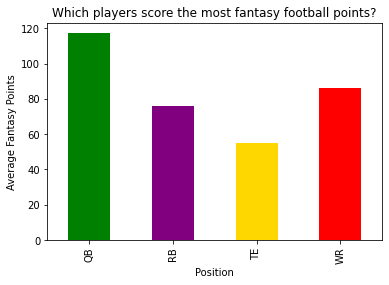

In [24]:
positionPoints_df.plot(kind="bar", color=["green", "purple", "gold", "red"])
plt.title("Which players score the most fantasy football points?")
plt.ylabel("Average Fantasy Points")
plt.show()

In [25]:
qb_data = sorted_df.loc[sorted_df["Position"] == "QB"]
qb_data

,Player,Team,Position,Age,Completions,Interceptions,Targets,Receptions,YdsPerRec,Fumbles,...,FantasyYear,PlayerID,Height,HeightFeet,HeightInches,Weight,Experience,ADP,Height_ft_in,Height_Total
2,Lamar Jackson,BAL,QB,22.0,265.0,6.0,0.0,0.0,0.0,9.0,...,2019,22049.0,"6'2""",6.0,2.0,215.0,0.0,NaN,72.0,74.0
1,Lamar Jackson,BAL,QB,22.0,265.0,6.0,0.0,0.0,0.0,9.0,...,2019,19781.0,"6'2""",6.0,2.0,212.0,4.0,20.0,72.0,74.0
631,Patrick Mahomes,KAN,QB,23.0,383.0,12.0,0.0,0.0,0.0,9.0,...,2018,18890.0,"6'3""",6.0,3.0,230.0,5.0,16.4,72.0,75.0
2432,Cam Newton,CAR,QB,26.0,296.0,10.0,0.0,0.0,0.0,5.0,...,2015,13320.0,"6'5""",6.0,5.0,245.0,11.0,134.0,72.0,77.0
1840,Aaron Rodgers,GNB,QB,33.0,401.0,7.0,0.0,0.0,0.0,8.0,...,2016,2593.0,"6'2""",6.0,2.0,225.0,18.0,100.1,72.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,Jarrett Stidham,NWE,QB,23.0,2.0,1.0,0.0,0.0,0.0,0.0,...,2019,20954.0,"6'3""",6.0,3.0,215.0,3.0,400.3,72.0,75.0
2998,Sean Renfree,ATL,QB,25.0,3.0,1.0,0.0,0.0,0.0,0.0,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1833,Tyler Bray,KAN,QB,26.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2017,15293.0,"6'6""",6.0,6.0,215.0,9.0,869.4,72.0,78.0
1254,Kyle Lauletta,NYG,QB,23.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2018,19913.0,"6'2""",6.0,2.0,219.0,3.0,1541.6,72.0,74.0


<AxesSubplot:title={'center':'QB Age vs Total Fantasy Points?'}, xlabel='Age', ylabel='FantasyPoints'>

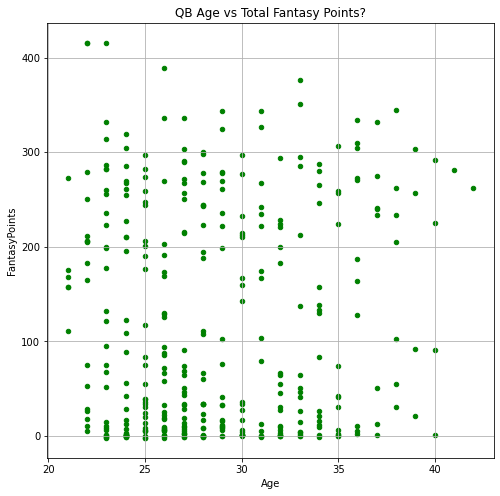

In [26]:
qb_data.plot(kind="scatter", x="Age", y="FantasyPoints", grid=True, figsize=(8,8), c="green", title="QB Age vs Total Fantasy Points?")

<AxesSubplot:title={'center':'QB Weight vs Total Fantasy Points?'}, xlabel='Weight', ylabel='FantasyPoints'>

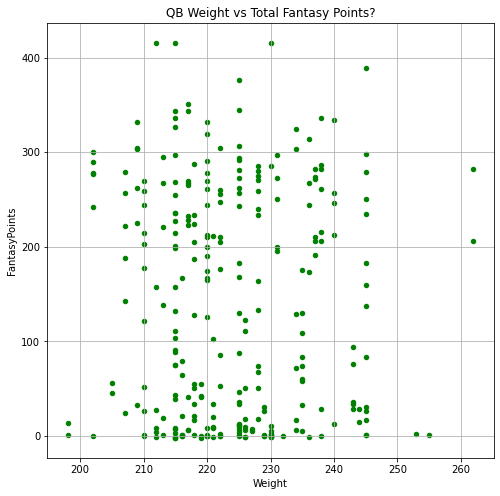

In [27]:
qb_data.plot(kind="scatter", x="Weight", y="FantasyPoints", grid=True, figsize=(8,8), c="green", title="QB Weight vs Total Fantasy Points?")

<AxesSubplot:title={'center':'QB Height vs Total Fantasy Points?'}, xlabel='Height_Total', ylabel='FantasyPoints'>

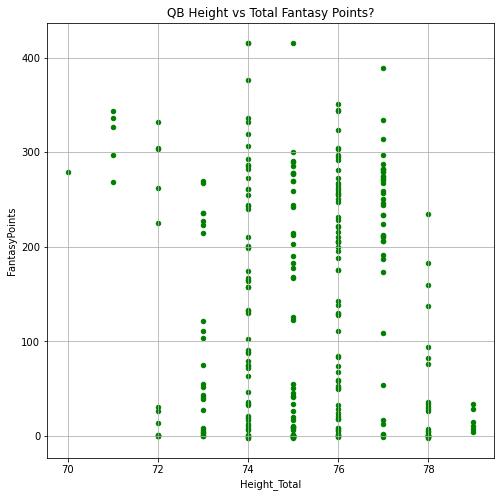

In [28]:
qb_data.plot(kind="scatter", x="Height_Total", y="FantasyPoints", grid=True, figsize=(8,8), c="green", title="QB Height vs Total Fantasy Points?")

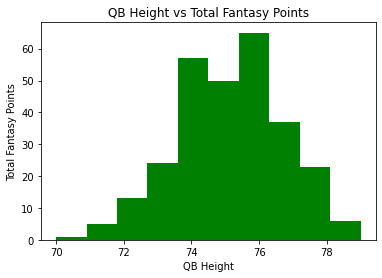

NormaltestResult(statistic=nan, pvalue=nan)


In [29]:
qb_heights = qb_data["Height_Total"]
plt.hist(qb_heights, color="green")
plt.title("QB Height vs Total Fantasy Points")
plt.xlabel("QB Height")
plt.ylabel("Total Fantasy Points")
plt.show()
print(sts.normaltest(heights.sample(50)))

In [30]:
rb_data = sorted_df.loc[sorted_df["Position"] == "RB"]
rb_data

,Player,Team,Position,Age,Completions,Interceptions,Targets,Receptions,YdsPerRec,Fumbles,...,FantasyYear,PlayerID,Height,HeightFeet,HeightInches,Weight,Experience,ADP,Height_ft_in,Height_Total
0,Christian McCaffrey,CAR,RB,23.0,0.0,0.0,142.0,116.0,8.66,1.0,...,2019,18877.0,"5'11""",5.0,11.0,205.0,5.0,1.7,60.0,71.0
1837,David Johnson,ARI,RB,25.0,0.0,0.0,120.0,80.0,10.99,5.0,...,2016,16847.0,"6'1""",6.0,1.0,224.0,8.0,30.7,72.0,73.0
1836,David Johnson,ARI,RB,25.0,0.0,0.0,120.0,80.0,10.99,5.0,...,2016,8508.0,"6'0""",6.0,0.0,224.0,10.0,NaN,72.0,72.0
629,Christian McCaffrey,CAR,RB,22.0,1.0,0.0,124.0,107.0,8.10,4.0,...,2018,18877.0,"5'11""",5.0,11.0,205.0,5.0,1.7,60.0,71.0
628,Saquon Barkley,NYG,RB,21.0,0.0,0.0,121.0,91.0,7.92,0.0,...,2018,19766.0,"5'11""",5.0,11.0,233.0,4.0,3.3,60.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,Bronson Hill,ARI,RB,24.0,0.0,0.0,0.0,0.0,0.00,0.0,...,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2373,Brandon Burks,NYJ,RB,23.0,0.0,0.0,0.0,0.0,0.00,0.0,...,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3028,Isaiah Pead,STL,RB,26.0,0.0,0.0,0.0,0.0,0.00,1.0,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3027,Marcus Murphy,NOR,RB,24.0,0.0,0.0,0.0,0.0,0.00,3.0,...,2015,16989.0,"5'9""",5.0,9.0,195.0,5.0,1046.1,60.0,69.0


<AxesSubplot:title={'center':'RB Age vs Total Fantasy Points?'}, xlabel='Age', ylabel='FantasyPoints'>

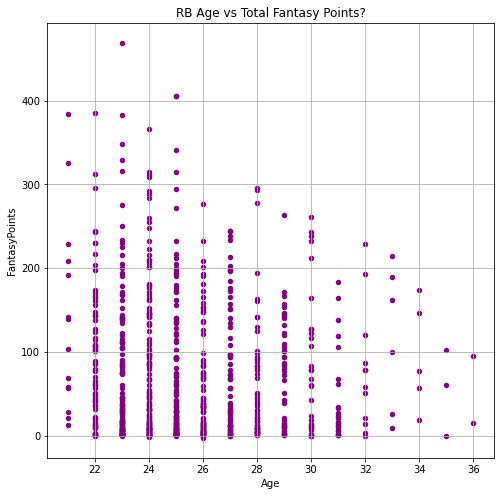

In [31]:
rb_data.plot(kind="scatter", x="Age", y="FantasyPoints", grid=True, figsize=(8,8), c="purple", title="RB Age vs Total Fantasy Points?")

<AxesSubplot:title={'center':'RB Weight vs Total Fantasy Points?'}, xlabel='Weight', ylabel='FantasyPoints'>

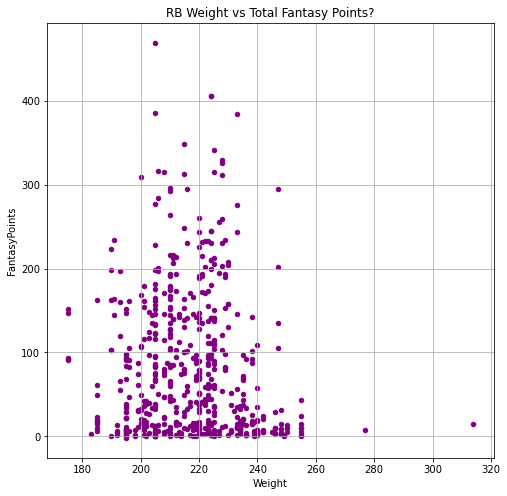

In [32]:
rb_data.plot(kind="scatter", x="Weight", y="FantasyPoints", grid=True, figsize=(8,8), c="purple", title="RB Weight vs Total Fantasy Points?")

<AxesSubplot:title={'center':'RB Height vs Total Fantasy Points?'}, xlabel='Height_Total', ylabel='FantasyPoints'>

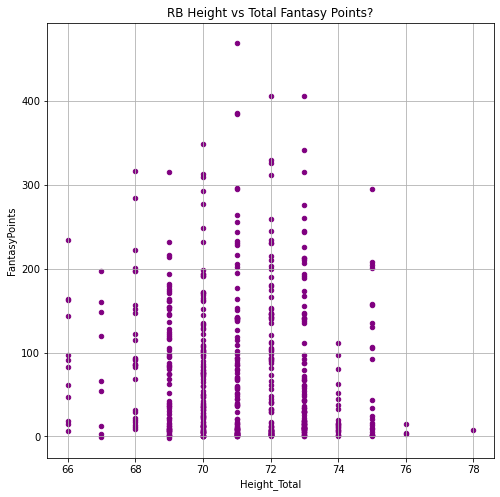

In [33]:
rb_data.plot(kind="scatter", x="Height_Total", y="FantasyPoints", grid=True, figsize=(8,8), c="purple", title="RB Height vs Total Fantasy Points?")

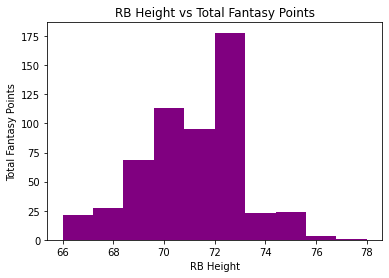

NormaltestResult(statistic=nan, pvalue=nan)


In [34]:
rb_heights = rb_data["Height_Total"]
plt.hist(rb_heights, color="purple")
plt.title("RB Height vs Total Fantasy Points")
plt.xlabel("RB Height")
plt.ylabel("Total Fantasy Points")
plt.show()
print(sts.normaltest(heights.sample(50)))

In [35]:
wr_data = sorted_df.loc[sorted_df["Position"] == "WR"]
wr_data

,Player,Team,Position,Age,Completions,Interceptions,Targets,Receptions,YdsPerRec,Fumbles,...,FantasyYear,PlayerID,Height,HeightFeet,HeightInches,Weight,Experience,ADP,Height_ft_in,Height_Total
2428,Antonio Brown,PIT,WR,27.0,0.0,0.0,193.0,136.0,13.49,3.0,...,2015,11056.0,"5'10""",5.0,10.0,186.0,13.0,NaN,60.0,70.0
7,Michael Thomas,NOR,WR,26.0,0.0,0.0,185.0,149.0,11.58,1.0,...,2019,17960.0,"6'3""",6.0,3.0,212.0,7.0,10.1,72.0,75.0
8,Michael Thomas,NOR,WR,26.0,0.0,0.0,185.0,149.0,11.58,1.0,...,2019,15589.0,"5'11""",5.0,11.0,195.0,9.0,886.6,60.0,71.0
2430,Julio Jones,ATL,WR,26.0,0.0,0.0,203.0,136.0,13.76,3.0,...,2015,13291.0,"6'3""",6.0,3.0,220.0,11.0,22.8,72.0,75.0
2433,Brandon Marshall,NYJ,WR,31.0,0.0,0.0,173.0,109.0,13.78,3.0,...,2015,14032.0,"6'1""",6.0,1.0,242.0,11.0,NaN,72.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,Rod Streater,CLE,WR,30.0,0.0,0.0,0.0,0.0,0.00,0.0,...,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
621,Quincy Enunwa,NYJ,WR,27.0,0.0,0.0,3.0,1.0,-4.00,1.0,...,2019,16063.0,"6'2""",6.0,2.0,225.0,8.0,895.8,72.0,74.0
2427,Matthew Slater,NWE,WR,31.0,0.0,0.0,1.0,0.0,0.00,2.0,...,2016,7651.0,"6'0""",6.0,0.0,205.0,15.0,564.3,72.0,72.0
2423,Jakeem Grant,MIA,WR,24.0,0.0,0.0,1.0,0.0,0.00,4.0,...,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'WR Age vs Total Fantasy Points?'}, xlabel='Age', ylabel='FantasyPoints'>

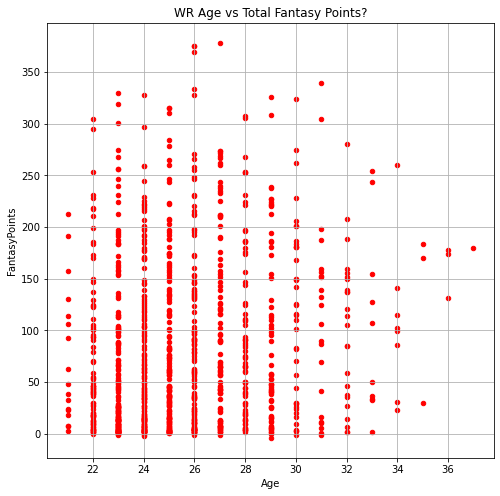

In [36]:
wr_data.plot(kind="scatter", x="Age", y="FantasyPoints", grid=True, figsize=(8,8), c="red", title="WR Age vs Total Fantasy Points?")

<AxesSubplot:title={'center':'WR Weight vs Total Fantasy Points?'}, xlabel='Weight', ylabel='FantasyPoints'>

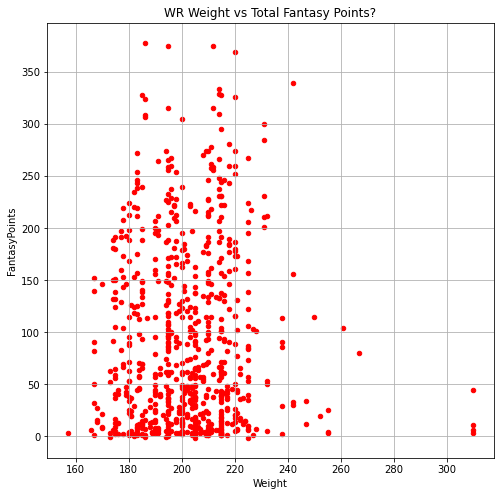

In [37]:
wr_data.plot(kind="scatter", x="Weight", y="FantasyPoints", grid=True, figsize=(8,8), c="red", title="WR Weight vs Total Fantasy Points?")

<AxesSubplot:title={'center':'WR Height vs Total Fantasy Points?'}, xlabel='Height_Total', ylabel='FantasyPoints'>

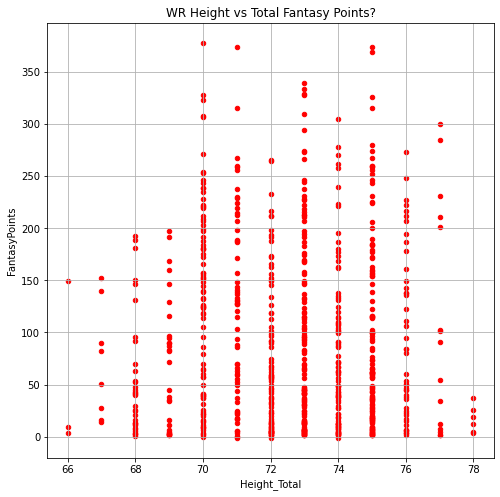

In [38]:
wr_data.plot(kind="scatter", x="Height_Total", y="FantasyPoints", grid=True, figsize=(8,8), c="red", title="WR Height vs Total Fantasy Points?")

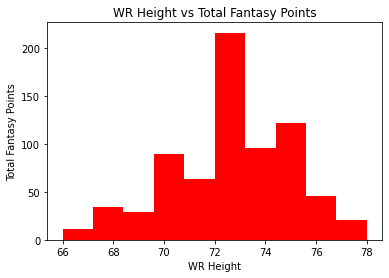

NormaltestResult(statistic=nan, pvalue=nan)


In [39]:
wr_heights = wr_data["Height_Total"]
plt.hist(wr_heights, color="red")
plt.title("WR Height vs Total Fantasy Points")
plt.xlabel("WR Height")
plt.ylabel("Total Fantasy Points")
plt.show()
print(sts.normaltest(heights.sample(50)))

In [40]:
te_data = sorted_df.loc[sorted_df["Position"] == "TE"]
te_data

,Player,Team,Position,Age,Completions,Interceptions,Targets,Receptions,YdsPerRec,Fumbles,...,FantasyYear,PlayerID,Height,HeightFeet,HeightInches,Weight,Experience,ADP,Height_ft_in,Height_Total
634,Travis Kelce,KAN,TE,29.0,0.0,0.0,150.0,103.0,12.97,2.0,...,2018,15048.0,"6'5""",6.0,5.0,260.0,11.0,25.2,72.0,77.0
643,Zach Ertz,PHI,TE,28.0,0.0,0.0,156.0,116.0,10.03,1.0,...,2018,14856.0,"6'5""",6.0,5.0,250.0,11.0,62.3,72.0,77.0
641,George Kittle,SFO,TE,25.0,0.0,0.0,136.0,88.0,15.65,0.0,...,2018,19063.0,"6'4""",6.0,4.0,250.0,5.0,31.3,72.0,76.0
2436,Rob Gronkowski,NWE,TE,26.0,0.0,0.0,120.0,72.0,16.33,0.0,...,2015,10974.0,"6'6""",6.0,6.0,268.0,11.0,77.7,72.0,78.0
9,Travis Kelce,KAN,TE,30.0,0.0,0.0,136.0,97.0,12.67,1.0,...,2019,15048.0,"6'5""",6.0,5.0,260.0,11.0,25.2,72.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,Asante Cleveland,NWE,TE,23.0,0.0,0.0,1.0,1.0,1.00,0.0,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3008,Geoff Swaim,DAL,TE,22.0,0.0,0.0,1.0,1.0,0.00,0.0,...,2015,17005.0,"6'4""",6.0,4.0,245.0,8.0,566.6,72.0,76.0
2401,Troy Niklas,ARI,TE,24.0,0.0,0.0,2.0,1.0,0.00,0.0,...,2016,16648.0,"6'6""",6.0,6.0,270.0,7.0,NaN,72.0,78.0
3023,David Johnson,SDG,TE,28.0,0.0,0.0,2.0,1.0,4.00,1.0,...,2015,16847.0,"6'1""",6.0,1.0,224.0,8.0,30.7,72.0,73.0


<AxesSubplot:title={'center':'TE Age vs Total Fantasy Points?'}, xlabel='Age', ylabel='FantasyPoints'>

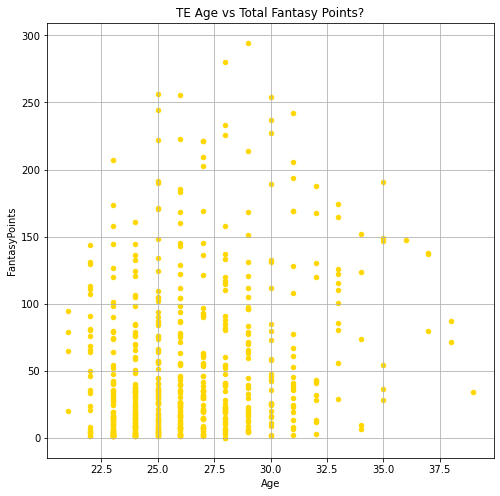

In [41]:
te_data.plot(kind="scatter", x="Age", y="FantasyPoints", grid=True, figsize=(8,8), c="gold", title="TE Age vs Total Fantasy Points?")

<AxesSubplot:title={'center':'TE Weight vs Total Fantasy Points?'}, xlabel='Weight', ylabel='FantasyPoints'>

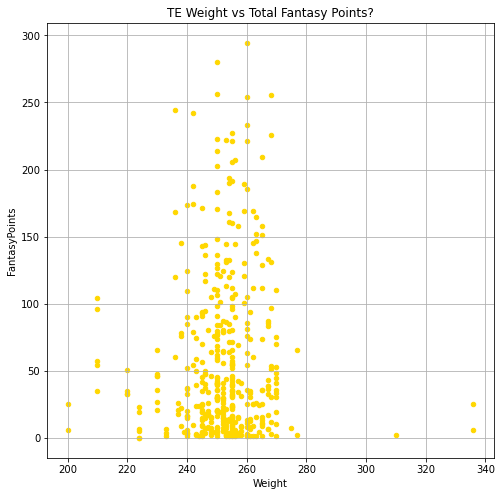

In [42]:
te_data.plot(kind="scatter", x="Weight", y="FantasyPoints", grid=True, figsize=(8,8), c="gold", title="TE Weight vs Total Fantasy Points?")

<AxesSubplot:title={'center':'TE Height vs Total Fantasy Points?'}, xlabel='Height_Total', ylabel='FantasyPoints'>

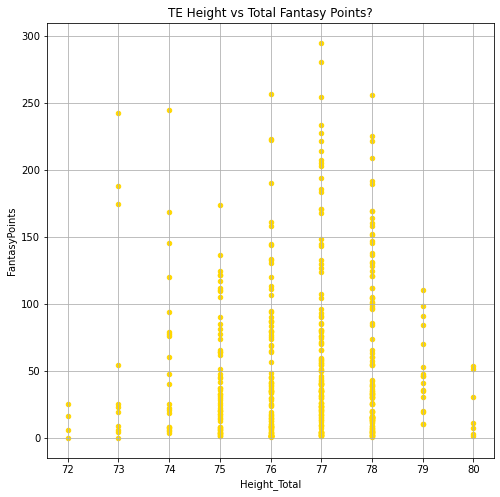

In [43]:
te_data.plot(kind="scatter", x="Height_Total", y="FantasyPoints", grid=True, figsize=(8,8), c="gold", title="TE Height vs Total Fantasy Points?")

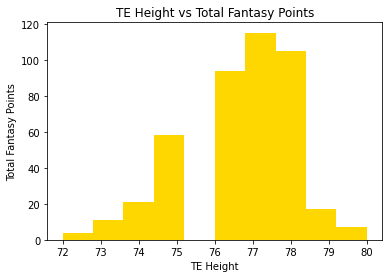

NormaltestResult(statistic=nan, pvalue=nan)


In [44]:
te_heights = te_data["Height_Total"]
plt.hist(te_heights, color="gold")
plt.title("TE Height vs Total Fantasy Points")
plt.xlabel("TE Height")
plt.ylabel("Total Fantasy Points")
plt.show()
print(sts.normaltest(heights.sample(50)))

In [45]:
top60 = sorted_df.head(60)
corr_df = top60[["Position", "Age", "Weight", "Height_Total", "FantasyPoints"]]
corr_df

,Position,Age,Weight,Height_Total,FantasyPoints
0,RB,23.0,205.0,71.0,469.20
2,QB,22.0,215.0,74.0,415.68
1,QB,22.0,212.0,74.0,415.68
631,QB,23.0,230.0,75.0,415.08
1837,RB,25.0,224.0,73.0,405.80
1836,RB,25.0,224.0,72.0,405.80
2432,QB,26.0,245.0,77.0,389.08
629,RB,22.0,205.0,71.0,385.50
628,RB,21.0,233.0,71.0,383.80
1257,RB,23.0,NaN,NaN,383.30


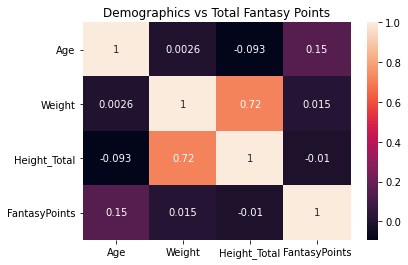

In [46]:
corrMatrix = sorted_df[["Age", "Weight", "Height_Total", "FantasyPoints"]].loc[sorted_df["Position"] == "WR"].corr()
sn.heatmap(corrMatrix, annot=True).set_title("Demographics vs Total Fantasy Points")
plt.show()

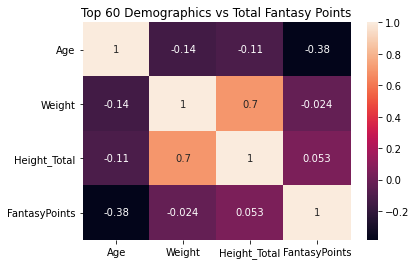

In [47]:
corrMatrix = top60[["Age", "Weight", "Height_Total", "FantasyPoints"]].loc[sorted_df["Position"] == "QB"].corr()
sn.heatmap(corrMatrix, annot=True).set_title("Top 60 Demographics vs Total Fantasy Points")
plt.show()

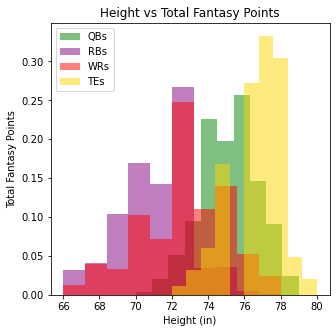

In [48]:
plt.figure(figsize=(5,5))
plt.title("Height vs Total Fantasy Points")
plt.xlabel("Height (in)")
plt.ylabel("Total Fantasy Points")
plt.hist(qb_heights, density=True, alpha = 0.5, color="green", label="QBs")
plt.hist(rb_heights, density=True, alpha = 0.5,  color="purple", label="RBs")
plt.hist(wr_heights, density=True, alpha = 0.5, color="red", label="WRs")
plt.hist(te_heights, density=True, alpha = 0.5, color="gold", label="TEs")
plt.legend()

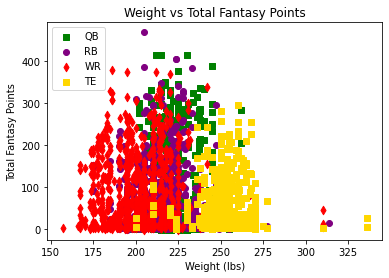

In [49]:
x = range(150,350)
y = range(0,400)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(qb_data["Weight"], qb_data["FantasyPoints"], c = "green", marker="s", label="QB")
ax1.scatter(rb_data["Weight"],rb_data["FantasyPoints"], c = "purple", marker="o", label="RB")
ax1.scatter(wr_data["Weight"], wr_data["FantasyPoints"], c = "red", marker="d", label="WR")
ax1.scatter(te_data["Weight"],te_data["FantasyPoints"], c = "gold", marker="s", label="TE")

plt.legend(loc='upper left');
plt.title("Weight vs Total Fantasy Points")
plt.xlabel("Weight (lbs)")
plt.ylabel("Total Fantasy Points")
plt.show()

In [74]:
qb_age = qb_data["Age"]
rb_age = rb_data["Age"]
wr_age = wr_data["Age"]
te_age = te_data["Age"]

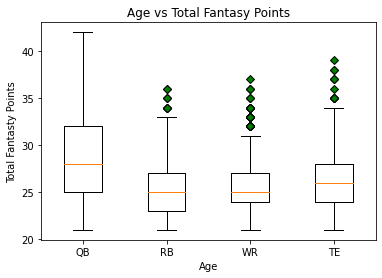

In [75]:
green_diamond = dict(markerfacecolor='g', marker='D')
plots = [qb_age, rb_age, wr_age, te_age]
labels = ["QB", "RB", "WR", "TE"]
fig1, ax1 = plt.subplots()
ax1.set_title("Age vs Football Position")
ax1.set_ylabel("Age")
ax1.set_xlabel("Position")
ax1.boxplot(plots, labels=labels, flierprops=green_diamond)
plt.show()
                                                                             

In [85]:
qb_group = top60.loc[top60["Position"] == "QB"]
rb_group = top60.loc[top60["Position"] == "RB"]
wr_group = top60.loc[top60["Position"] == "WR"]
te_group = top60.loc[top60["Position"] == "TE"]

In [86]:
qb_age_group = qb_group["Age"]
rb_age_group = rb_group["Age"]
wr_age_group = wr_group["Age"]
te_age_group = te_group["Age"]

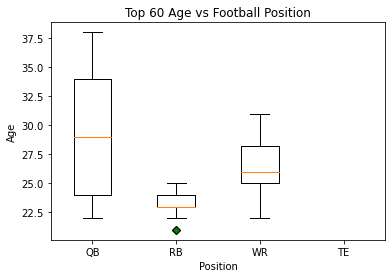

In [87]:
green_diamond = dict(markerfacecolor='g', marker='D')
plots = [qb_age_group, rb_age_group, wr_age_group, te_age_group]
labels = ["QB", "RB", "WR", "TE"]
fig1, ax1 = plt.subplots()
ax1.set_title("Top 60 Age vs Football Position")
ax1.set_ylabel("Age")
ax1.set_xlabel("Position")
ax1.boxplot(plots, labels=labels, flierprops=green_diamond)
plt.show()